## Importing libraries and dataset

In [154]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [156]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

### Get the numerical variables from our dataset. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


In [157]:
customer_df['Effective To Date']= pd.to_datetime(customer_df['Effective To Date'])
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

In [158]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


### Check using a distribution plot if the variables fit the theoretical normal or exponential distribution

In [159]:
def plot_numerical(df):
    for column in df:
        sns.distplot(df[column])
        plt.show()

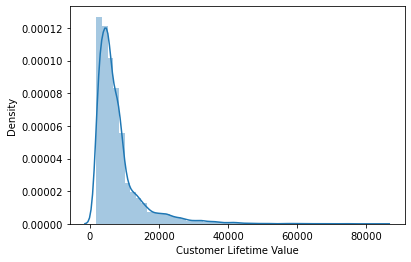

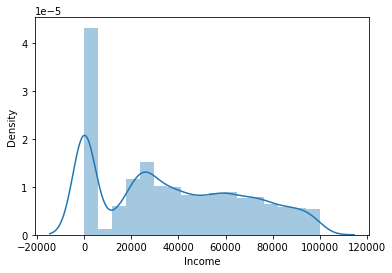

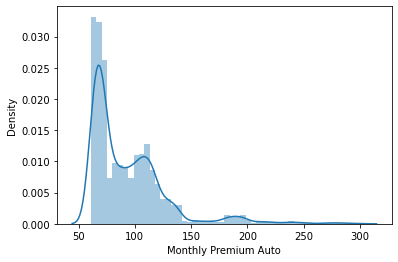

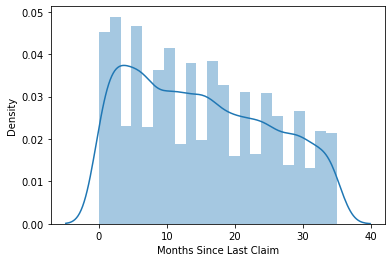

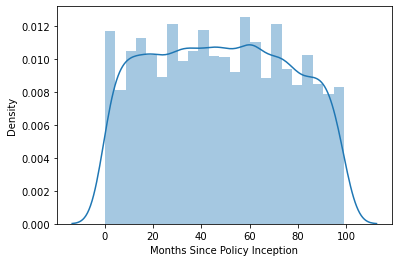

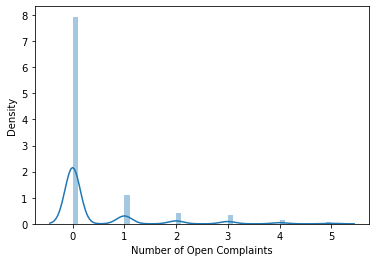

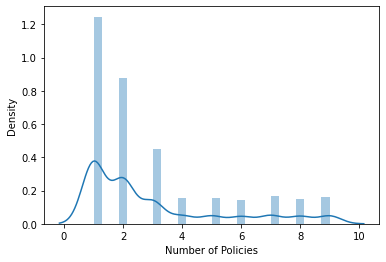

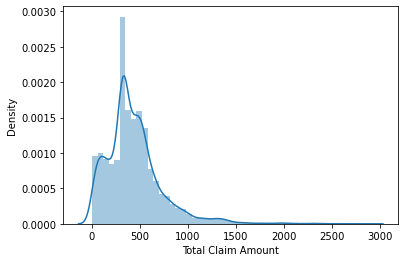

In [160]:
plot_numerical(numerical_df)

### Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result


## Log Transform

In [214]:
def log_transform(value):
    if np.isfinite(value) and value!=0:
        return np.log(value)
    else:
        return 0

In [215]:
numerical_df_log = numerical_df.applymap(log_transform)
#numerical_df_log.head()

In [216]:
numerical_df_log

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,0.000000,0.000000,5.952753
1,8.850738,0.000000,4.543295,2.564949,3.737670,0.000000,2.079442,7.031268
2,9.464008,10.794809,4.682131,2.890372,3.637586,0.000000,0.693147,6.339428
3,8.941920,0.000000,4.663439,2.890372,4.174387,0.000000,1.945910,6.272653
4,7.942253,10.688211,4.290459,2.484907,3.784190,0.000000,0.000000,4.928202
...,...,...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,0.000000,0.693147,5.289452
9130,8.038031,9.980634,4.369448,2.639057,3.332205,0.000000,0.000000,5.938064
9131,9.007476,0.000000,4.442651,2.197225,3.610918,1.098612,0.693147,6.673026
9132,8.925912,9.996112,4.564348,3.526361,1.098612,0.000000,1.098612,6.538429


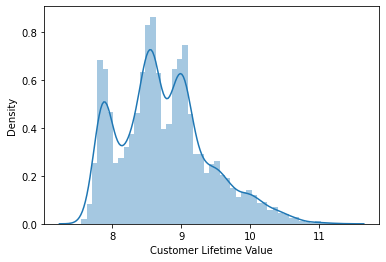

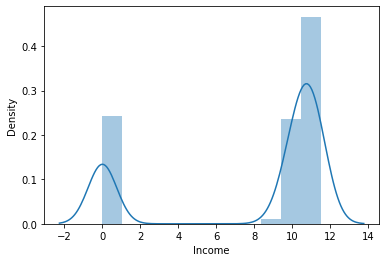

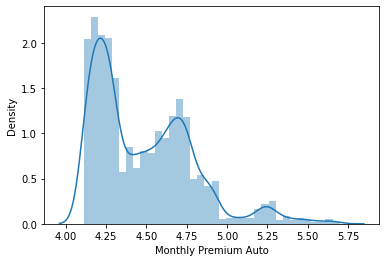

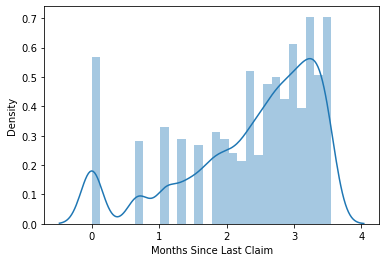

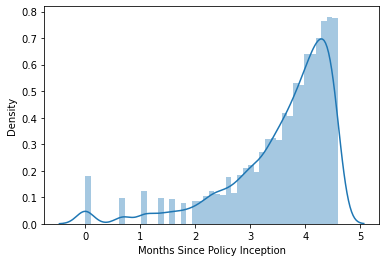

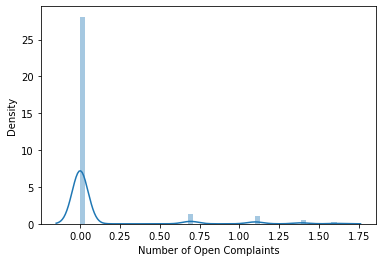

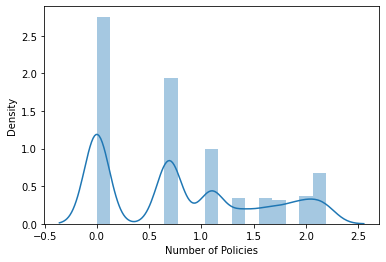

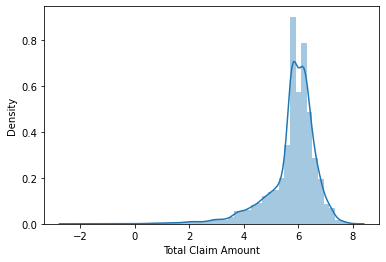

In [217]:
plot_numerical(numerical_df_log)

## SQRT Transform


In [207]:
def sqrt_transform(value):
    if np.isfinite(value) and value>=0:
        return np.sqrt(value)
    else:
        return 0

In [208]:
numerical_df_sqrt = numerical_df.applymap(sqrt_transform)

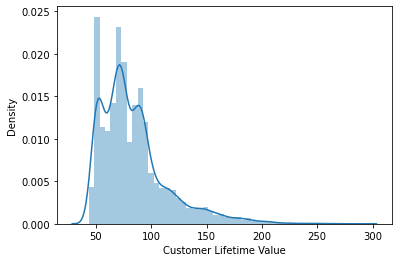

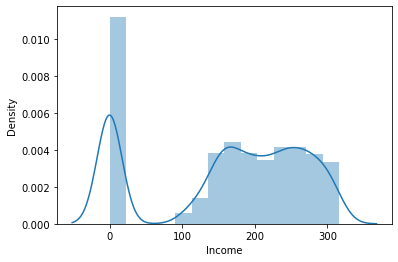

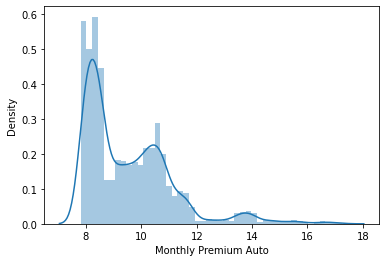

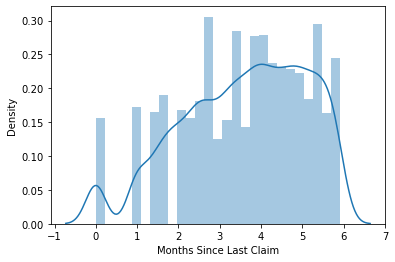

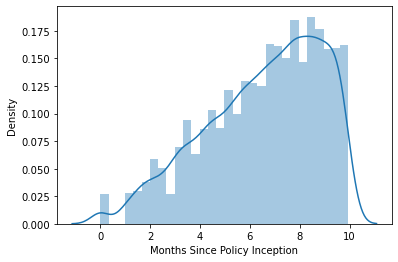

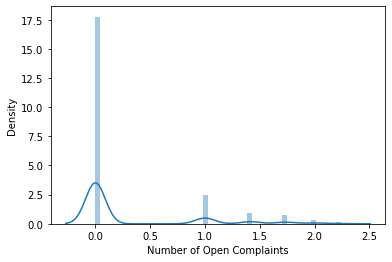

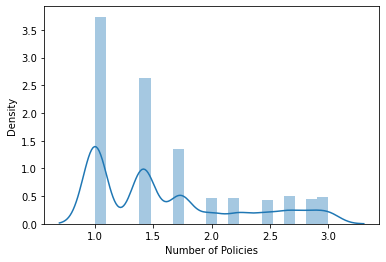

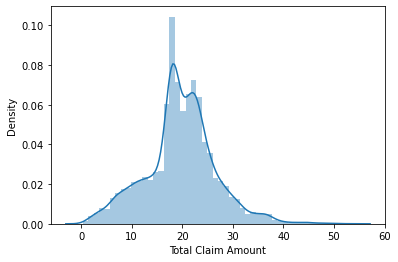

In [209]:
plot_numerical(numerical_df_sqrt)

## Normalizer

In [168]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numerical_df)
numerical_df_norm = pd.DataFrame(transformer.transform(numerical_df), columns=numerical_df.columns)
numerical_df_norm.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830
1,0.987006,0.000000,0.013293,0.001838,0.005939,0.0,0.001131,0.160005
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230
3,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145


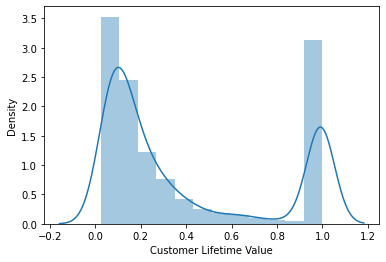

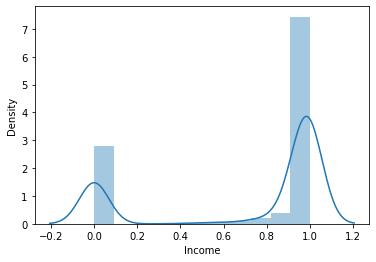

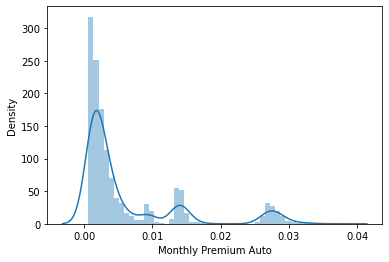

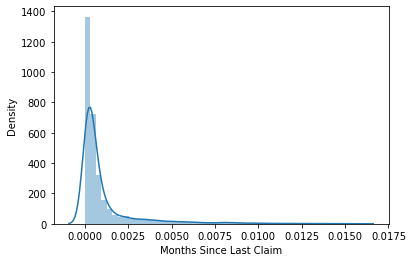

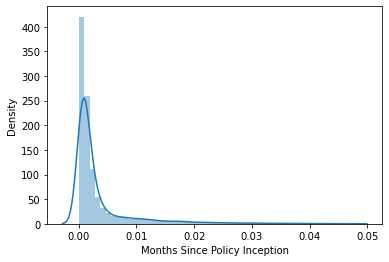

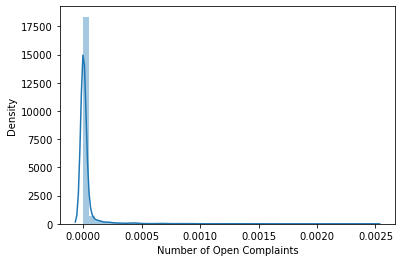

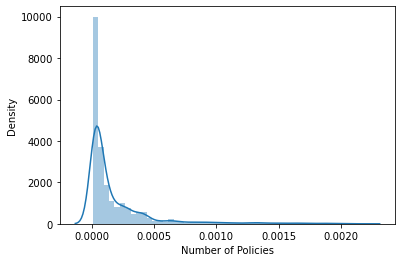

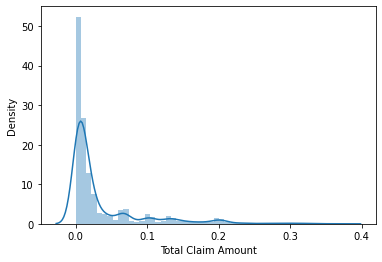

In [169]:
plot_numerical(numerical_df_norm)

## StandardScaler

In [170]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerical_df)
numerical_df_standardized = pd.DataFrame(transformer.transform(numerical_df), columns=numerical_df.columns)

In [171]:
numerical_df_standardized.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843


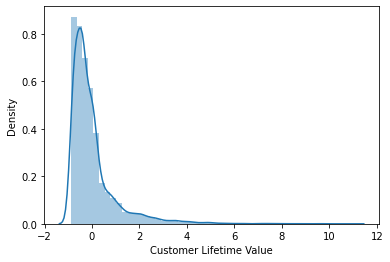

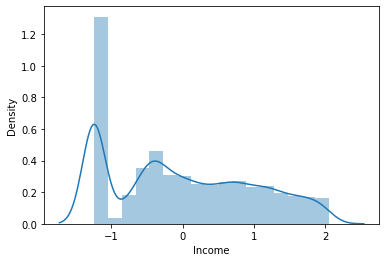

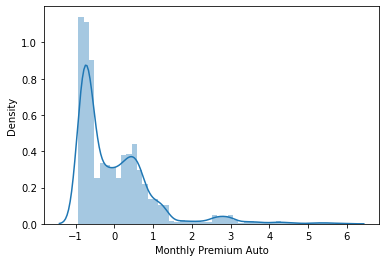

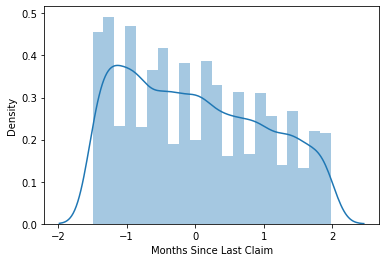

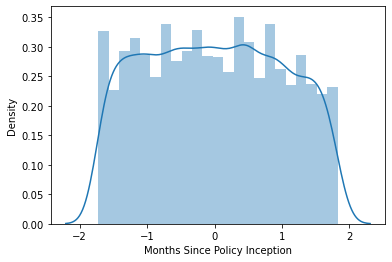

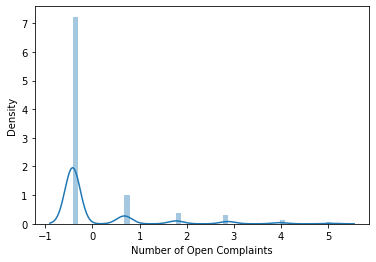

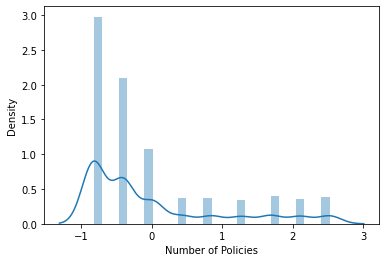

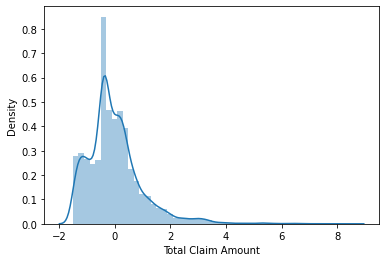

In [172]:
plot_numerical(numerical_df_standardized)

## MinMaxScaler

In [173]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(numerical_df)
numerical_df_minmax = pd.DataFrame(scaler.transform(numerical_df), columns=numerical_df.columns)
numerical_df_minmax.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


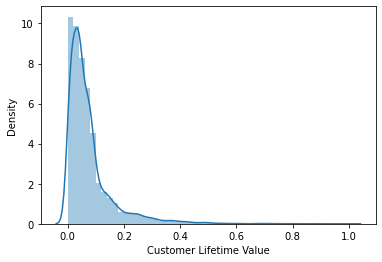

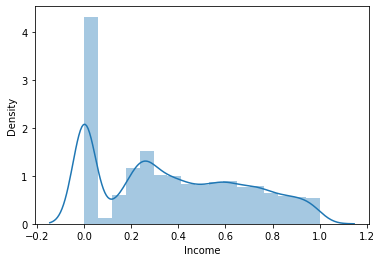

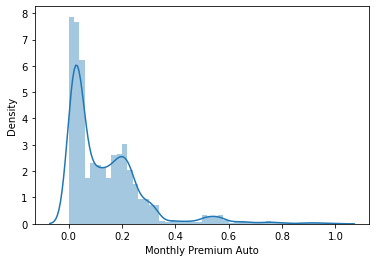

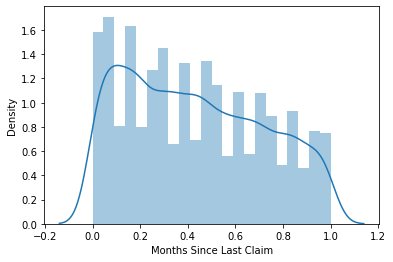

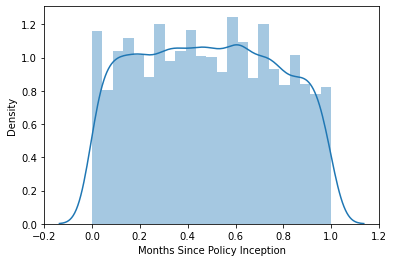

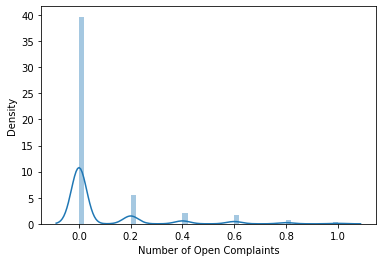

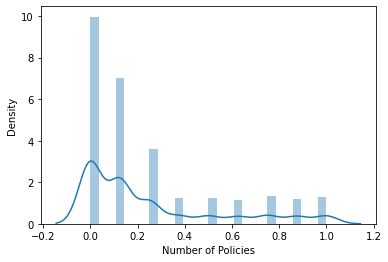

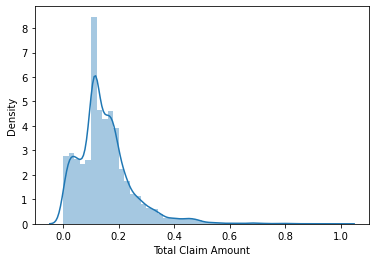

In [174]:
plot_numerical(numerical_df_minmax)

## BoxCox

In [175]:
from scipy import stats

In [178]:
# Checking zeros

for column_name in numerical_df.columns:
    column = numerical_df[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name.upper(), ' is : ', count)

Count of zeros in column  CUSTOMER LIFETIME VALUE  is :  0
Count of zeros in column  INCOME  is :  2317
Count of zeros in column  MONTHLY PREMIUM AUTO  is :  0
Count of zeros in column  MONTHS SINCE LAST CLAIM  is :  314
Count of zeros in column  MONTHS SINCE POLICY INCEPTION  is :  83
Count of zeros in column  NUMBER OF OPEN COMPLAINTS  is :  7252
Count of zeros in column  NUMBER OF POLICIES  is :  0
Count of zeros in column  TOTAL CLAIM AMOUNT  is :  0


In [176]:
numerical_df_positive=numerical_df.mask(numerical_df==0).fillna(1)

In [179]:
# Now checking zeros

for column_name in numerical_df_positive.columns:
    column = numerical_df_positive[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name.upper(), ' is : ', count)

Count of zeros in column  CUSTOMER LIFETIME VALUE  is :  0
Count of zeros in column  INCOME  is :  0
Count of zeros in column  MONTHLY PREMIUM AUTO  is :  0
Count of zeros in column  MONTHS SINCE LAST CLAIM  is :  0
Count of zeros in column  MONTHS SINCE POLICY INCEPTION  is :  0
Count of zeros in column  NUMBER OF OPEN COMPLAINTS  is :  0
Count of zeros in column  NUMBER OF POLICIES  is :  0
Count of zeros in column  TOTAL CLAIM AMOUNT  is :  0


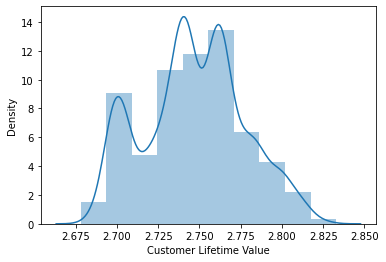

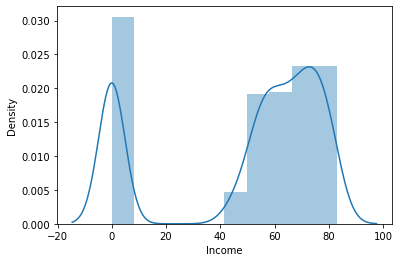

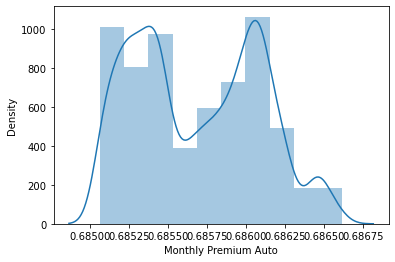

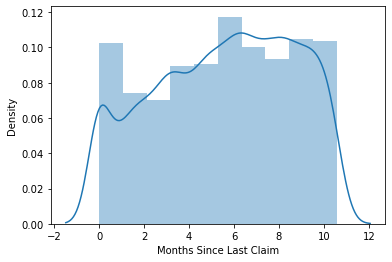

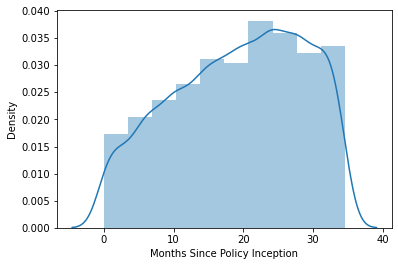

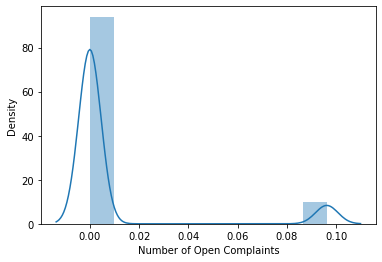

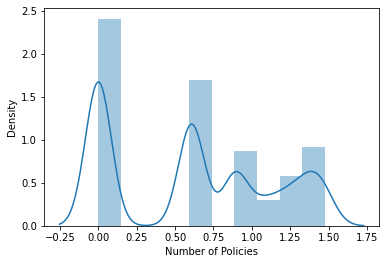

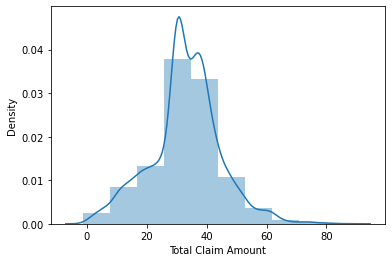

In [203]:
for i in numerical_df_positive.columns:
    a, b = stats.boxcox(numerical_df_positive[i])
    sns.distplot(a, bins=10).set(xlabel=i)
    plt.show()

## Report

#### Log,Sqrt tranformations and Normalizer didnt change any column to normal.StandardScaler and MinMaxScaler helped 'Months since policy inception'column to be more normal.Log tranform changed "Total Claim Amount" a bit to normal,but  it is still not normal distribution.In general,none of above transformations helped to normalize columns.Maybe we should apply more than one tranformation together to get better results
